In [1]:
# ----------------------------------------------------------------------------
# Title: Assignment 4.2
# Author: Surenther Selvaraj
# Date: 03 October 2025
# Modified By: Surenther Selvaraj
# Description: Predicting Fuel Efficiency
# Data: https://www.kaggle.com/datasets/uciml/autompg-dataset?select=auto-mpg.csv
# ----------------------------------------------------------------------------

In [2]:
# --- Importing Libraries ---
import pandas as pd
import numpy as np
import io
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [3]:
# Load the data from the Excel file into a Pandas DataFrame.
file_path = 'auto-mpg.csv'
df = pd.read_csv(file_path)

# Display the first 5 rows to visually inspect the data.
print(f"Successfully loaded '{file_path}'.")
print("\nFirst 5 rows of the DataFrame:")
print(df.head())

Successfully loaded 'auto-mpg.csv'.

First 5 rows of the DataFrame:
    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0          70   
3  16.0          8         304.0        150    3433          12.0          70   
4  17.0          8         302.0        140    3449          10.5          70   

   origin                   car name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


In [7]:
# --- Data Preprocessing Steps ---

# Remove the 'car name' column.
df_prepped = df.drop('car name', axis=1)

# Convert 'horsepower' to a numeric type.
# The `errors='coerce'` argument is crucial. It turns any value that cannot be converted to a number (like '?') into NaN.
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')

# Calculate the mean of the now-numeric 'horsepower' column.
# The .mean() function automatically ignores NaN values in its calculation.
horsepower_mean = df['horsepower'].mean()

# Replace all NaN values with the calculated mean.
# The `inplace=True` argument modifies the DataFrame directly.
df['horsepower'] = df['horsepower'].fillna(horsepower_mean)

# Create dummy variables for the 'origin' column.
# This converts the single 'origin' column into multiple True/False columns.
df_prepped = pd.get_dummies(df_prepped, columns=['origin'], prefix='origin')

# Display the first 5 rows to see the result
print("--- Prepped DataFrame Head ---")
print(df_prepped.head())

--- Prepped DataFrame Head ---
    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model year  origin_1  origin_2  origin_3  
0          70      True     False     False  
1          70      True     False     False  
2          70      True     False     False  
3          70      True     False     False  
4          70      True     False     False  


--- Correlation of Features with MPG ---
mpg             1.000000
model year      0.579267
origin_3        0.442174
acceleration    0.420289
origin_2        0.259022
origin_1       -0.568192
horsepower     -0.771437
cylinders      -0.775396
displacement   -0.804203
weight         -0.831741
Name: mpg, dtype: float64

Correlation heatmap has been saved as 'correlation_heatmap.png'.


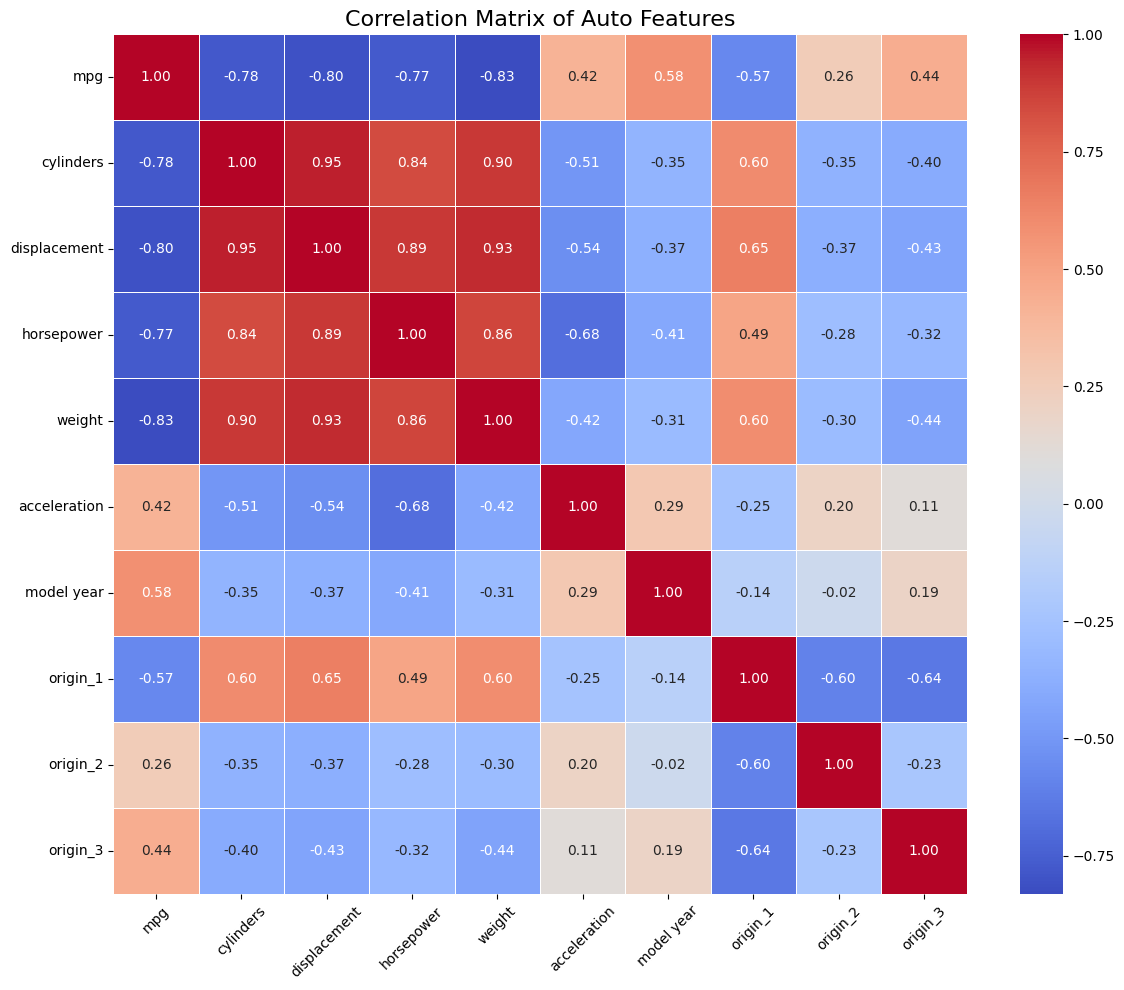

In [8]:
# Calculate the Correlation Matrix
# The .corr() method computes the pairwise correlation of columns.
corr_matrix = df_prepped.corr()


# Isolate and Display Correlations with 'mpg'
# This helps to answer the specific question about mpg's relationships.
mpg_corr = corr_matrix['mpg'].sort_values(ascending=False)

print("--- Correlation of Features with MPG ---")
print(mpg_corr)


# Create and Save the Heatmap Visualization
# Set the size of the plot
plt.figure(figsize=(12, 10))

# Generate the heatmap using seaborn
sns.heatmap(
    corr_matrix,      
    annot=True,       
    cmap='coolwarm',  
    fmt=".2f",        
    linewidths=.5   
)

# Add a title and adjust layout
plt.title('Correlation Matrix of Auto Features', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()

# Save the plot to a file
plt.savefig('correlation_heatmap.png')

print("\nCorrelation heatmap has been saved as 'correlation_heatmap.png'.")

### Conclusion

The correlation analysis reveals a clear and dominant trend: factors related to a car's size and power are the best predictors of its MPG. The features weight, displacement, cylinders, and horsepower all have strong negative correlations (below -0.77). This means that as any of these features increase, the car's MPG significantly decreases.

Secondary factors also play a role. The model year has a moderate positive correlation (+0.58), indicating that newer cars in this dataset are more fuel-efficient, likely due to technological advancements. A car's origin also matters, with American cars (origin_1) showing a moderate negative correlation (-0.57) with MPG compared to cars from other regions.

Scatter plot has been saved as 'mpg_vs_weight_scatter.png'


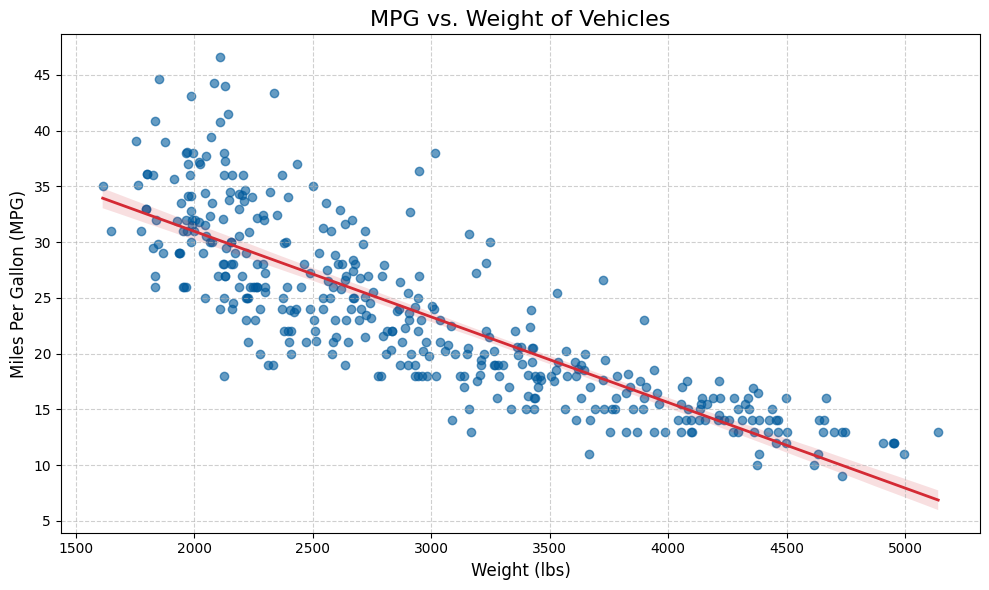

In [9]:
# Create the Scatter Plot with Regression Line

# Set the overall size of the plot
plt.figure(figsize=(10, 6))

# Use seaborn's regplot to create the scatter plot and add a linear regression line
sns.regplot(data=df_prepped, x='weight', y='mpg',
            scatter_kws={'alpha':0.6, 'color':'#005A9C'},
            line_kws={'color':'#D42A34', 'linewidth':2}) 

# Step 3: Add Labels, Title, and Grid for better readability
plt.title('MPG vs. Weight of Vehicles', fontsize=16)
plt.xlabel('Weight (lbs)', fontsize=12)
plt.ylabel('Miles Per Gallon (MPG)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

# Ensure everything fits without overlapping
plt.tight_layout()

# Step 4: Save the Figure to a File
plt.savefig('mpg_vs_weight_scatter.png')

print("Scatter plot has been saved as 'mpg_vs_weight_scatter.png'")


### Conclusion

The analysis reveals a clear and dominant trend: factors related to a car's size and power are the best predictors of its MPG. The features weight, displacement, cylinders, and horsepower all have strong negative correlations (coefficients from -0.77 to -0.83). This means that as any of these features increase, the car's MPG significantly decreases.

Secondary factors also play a role. The model year has a moderate positive correlation (+0.58), indicating that newer cars in this dataset are more fuel-efficient, likely due to technological advancements. A car's origin also matters, with American cars (origin_1) showing a moderate negative correlation (-0.57) with MPG compared to cars from other regions.

In [10]:
# --- Data Splitting for Model Training and Testing ---

# Define Features (X) and Target (y)
# The target 'y' is the 'mpg' column.
y = df_prepped['mpg']

# The features 'X' are all columns EXCEPT 'mpg'.
X = df_prepped.drop('mpg', axis=1)


# Randomly Split the Data
# test_size=0.2 means 20% of the data will be used for testing.
# random_state=42 ensures that the split is the same every time you run the code,
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# Verify the Split
# Print the shapes of the resulting datasets to confirm the 80/20 split.
print("--- Data Split Complete ---")
print(f"Features training set shape: {X_train.shape}")
print(f"Target training set shape:   {y_train.shape}")
print(f"Features test set shape:     {X_test.shape}")
print(f"Target test set shape:       {y_test.shape}")

--- Data Split Complete ---
Features training set shape: (318, 9)
Target training set shape:   (318,)
Features test set shape:     (80, 9)
Target test set shape:       (80,)


In [11]:
# --- Train the Linear Regression Model ---

# Initialize the model This creates an instance of the Linear Regression model class.
model = LinearRegression()

# Train the model using the training data
# The .fit() method teaches the model the relationship between your features (X_train) and your target (y_train).
model.fit(X_train, y_train)


# --- Display the Results of the Training ---
# The "trained" model consists of the learned intercept and coefficients.

print("--- Model Training Complete ---")
print(f"Intercept (the model's baseline): {model.intercept_:.4f}")

# Create a DataFrame to view the feature coefficients clearly
coeffs = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print("\n--- Learned Coefficients ---")
print(coeffs)

--- Model Training Complete ---
Intercept (the model's baseline): -20.2027

--- Learned Coefficients ---
              Coefficient
cylinders       -0.163730
displacement     0.019584
horsepower      -0.013345
weight          -0.007073
acceleration     0.073350
model year       0.827397
origin_1        -1.864049
origin_2         1.075196
origin_3         0.788853


### Conclusion

The trained linear regression model provides a formula to predict MPG. The intercept (-20.20) is the theoretical starting point, while the coefficients show how much MPG changes for a one-unit increase in each feature, assuming all other features are held constant.

The most influential factors are:\
    model year (+0.83): For each year newer, a car's MPG is expected to increase by 0.83. This is the strongest positive predictor.\
    weight (-0.007): For every 100-pound increase in weight, MPG is expected to decrease by 0.7. This is a powerful negative predictor.\
    origin_1 (-1.86): A car from the USA is predicted to have about 1.86 less MPG than the baseline, even after accounting for its weight, power, etc.

An interesting result is the small positive coefficient for displacement. This contradicts its strong negative correlation and is a classic sign of multicollinearity—because displacement, weight, and horsepower are so highly correlated, the model has difficulty isolating the independent effect of each one. The overall negative impact of a large engine is captured, but it's distributed across those related features.

In [12]:
# --- Evaluate the Model ---

# a. Make predictions on both the training and test data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# b. Calculate metrics for the Training Set
r2_train = r2_score(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
mae_train = mean_absolute_error(y_train, y_train_pred)

# c. Calculate metrics for the Test Set
r2_test = r2_score(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
mae_test = mean_absolute_error(y_test, y_test_pred)


# --- Display the Evaluation Metrics ---
print("--- Model Evaluation Results ---")
print("\n--- Training Set ---")
print(f"R-squared (R²): {r2_train:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_train:.4f}")
print(f"Mean Absolute Error (MAE): {mae_train:.4f}")

print("\n--- Test Set ---")
print(f"R-squared (R²): {r2_test:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.4f}")
print(f"Mean Absolute Error (MAE): {mae_test:.4f}")

--- Model Evaluation Results ---

--- Training Set ---
R-squared (R²): 0.8188
Root Mean Squared Error (RMSE): 3.3703
Mean Absolute Error (MAE): 2.6055

--- Test Set ---
R-squared (R²): 0.8449
Root Mean Squared Error (RMSE): 2.8878
Mean Absolute Error (MAE): 2.2876


### Conclusion

The evaluation metrics provide a very positive assessment of the model's performance. The R-squared (R²) value on the test set is 0.8449, which means the model can explain approximately 84.5% of the variability in a car's MPG using the provided features. This indicates a very good fit.

Most importantly, the performance on the test set is slightly better than on the training set across all metrics (higher R², lower RMSE and MAE). This is an excellent outcome, as it strongly suggests the model is not overfitting. It has learned the underlying patterns in the data without memorizing the noise, allowing it to generalize effectively to new data it has never seen before.

The Mean Absolute Error (MAE) on the test set is 2.29, meaning that, on average, the model's MPG prediction is off by only about 2.3 miles per gallon, which is a practically useful level of accuracy.

In [14]:
# --- Train the Random Forest Regressor Model ---

# Initialize the model We set random_state for reproducibility of the results.
rf_model = RandomForestRegressor(random_state=42)

# Train the model using the training data
rf_model.fit(X_train, y_train)

# ---Evaluate the Random Forest Model ---

# Make predictions on both the training and test data
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)

# Calculate metrics for the Training Set
r2_train_rf = r2_score(y_train, y_train_pred_rf)
rmse_train_rf = np.sqrt(mean_squared_error(y_train, y_train_pred_rf))
mae_train_rf = mean_absolute_error(y_train, y_train_pred_rf)

# Calculate metrics for the Test Set
r2_test_rf = r2_score(y_test, y_test_pred_rf)
rmse_test_rf = np.sqrt(mean_squared_error(y_test, y_test_pred_rf))
mae_test_rf = mean_absolute_error(y_test, y_test_pred_rf)


# --- Display the Evaluation Metrics ---
print("\n--- Model Evaluation Results ---")
print("\n--- Training Set (Random Forest) ---")
print(f"R-squared (R²): {r2_train_rf:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_train_rf:.4f}")
print(f"Mean Absolute Error (MAE): {mae_train_rf:.4f}")

print("\n--- Test Set (Random Forest) ---")
print(f"R-squared (R²): {r2_test_rf:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test_rf:.4f}")
print(f"Mean Absolute Error (MAE): {mae_test_rf:.4f}")


--- Model Evaluation Results ---

--- Training Set (Random Forest) ---
R-squared (R²): 0.9808
Root Mean Squared Error (RMSE): 1.0965
Mean Absolute Error (MAE): 0.7471

--- Test Set (Random Forest) ---
R-squared (R²): 0.9145
Root Mean Squared Error (RMSE): 2.1437
Mean Absolute Error (MAE): 1.5960


Conclusion

This model is a significant improvement over the linear regression model. The performance on the unseen test set is excellent:

    R-squared (R²): The model explains 91.5% of the variance in MPG, which is a very high level of predictive power.

    Mean Absolute Error (MAE): On average, the model's predictions are off by only 1.60 MPG, indicating a high degree of accuracy.

However, the key observation is the large gap between the training and test set metrics. The R² drops from 98% to 91.5%, and the error metrics (RMSE and MAE) nearly double. This discrepancy indicates that the model has overfit the training data. It learned the training examples so well—including their noise and specific quirks—that its performance isn't quite as stellar on new, unseen data.

Even with this mild overfitting, the model is highly effective and superior to the simple linear model. Further tuning (e.g., adjusting model complexity) could help reduce the overfitting and potentially improve its generalization even more.